In [3]:
# load dataset
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123, normalize = True, polynomial_features = True)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [5]:
# Model Training
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2991.6392,21638936.7574,4651.7671,0.8708,0.3805,0.3009
1,3354.8688,32716789.7000,5719.8592,0.8098,0.4374,0.2987
2,3112.7014,22931827.7450,4788.7188,0.7097,0.5032,0.3922
3,2858.1465,19935607.3703,4464.9308,0.8335,0.4484,0.3740
4,3128.7482,28121315.1661,5302.9534,0.7908,0.4967,0.3077
5,3125.9872,23997737.4791,4898.7486,0.8456,0.5252,0.3058
6,2761.4170,21996135.3881,4690.0038,0.8503,0.3696,0.2909
7,3414.6486,29985501.7348,5475.9019,0.8351,0.4552,0.2905
8,3300.1945,25397591.3321,5039.6023,0.8360,0.4172,0.3584


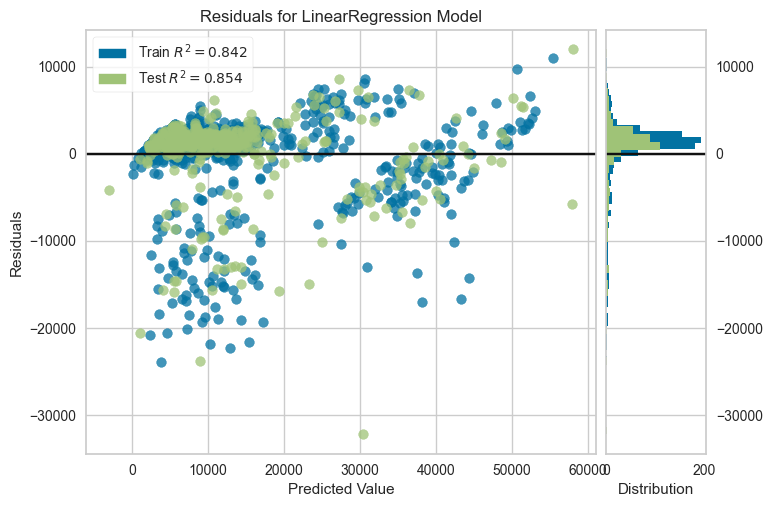

In [6]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [7]:
# save transformation pipeline and model 
save_model(lr, model_name = 'deployment_12012023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\klim_\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapp...
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(

In [3]:
model = load_model('deployment_12012023')

Transformation Pipeline and Model Successfully Loaded


In [9]:
import numpy as np
import pandas as pd
from pycaret.regression import *
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
final = np.array([55, 'male', 59, 1, 'male', 'northwest'])
data_unseen = pd.DataFrame([final], columns = cols)
prediction = predict_model(model, data = data_unseen, round = 0)
prediction = int(prediction.prediction_label[0])
print(prediction)

97414560945562992
